In [ ]:
!pip install --upgrade ibm_db
!pip install --upgrade ibm_db_sa
!pip install --upgrade SQLAlchemy

import ibm_db
import ibm_db_sa
import sqlalchemy

Requirement already up-to-date: ibm_db in /usr/local/lib/python3.7/dist-packages (3.0.3)
Requirement already up-to-date: ibm_db_sa in /usr/local/lib/python3.7/dist-packages (0.3.6)
Requirement already up-to-date: SQLAlchemy in /usr/local/lib/python3.7/dist-packages (1.3.23)


In [ ]:
%load_ext sql


In [ ]:
%sql db2+ibm_db://hwq67488:88c-68fwtjfkdl5c@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB



DB2/LINUXX8664


'Connected: hwq67488@BLUDB'

In [ ]:
import pandas

chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

%sql PERSIST chicago_socioeconomic_data

 * db2+ibm_db://hwq67488:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

In [ ]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * db2+ibm_db://hwq67488:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


### Problem 1

##### How many rows are in the dataset?

In [ ]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;


 * db2+ibm_db://hwq67488:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?

In [ ]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;


 * db2+ibm_db://hwq67488:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


### Problem 3

##### What is the maximum value of hardship index in this dataset?

In [ ]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * db2+ibm_db://hwq67488:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


### Problem 4

##### Which community area which has the highest hardship index?

In [ ]:
#We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

#or another option:
#%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

#or you can use a sub-query to determine the max hardship index:
#%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

 * db2+ibm_db://hwq67488:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?

In [ ]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * db2+ibm_db://hwq67488:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.

 * db2+ibm_db://hwq67488:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


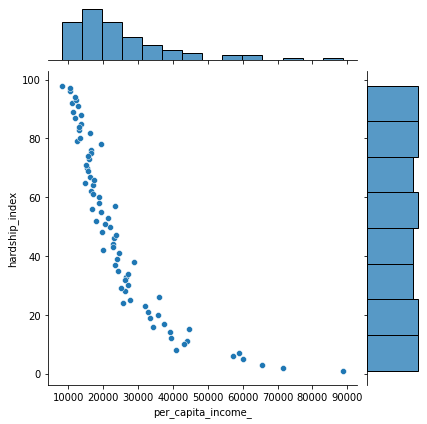

In [ ]:
# if the import command gives ModuleNotFoundError: No module named 'seaborn'
# then uncomment the following line i.e. delete the # to install the seaborn package 
# !pip install seaborn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())